### Speech Classification & Sentiment/Emotion Detection Using Advance Machine Learning Techniques
----------------------------



Mounting the drive for dataset

In [ ]:
# pip install vaderSentiment

Importing the neccessary libraries


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import IPython.display as ipd
# % pylab inline
import os
import pandas as pd
import librosa
import glob 
import librosa.display
import random
import shutil
import nltk

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

from keras.utils.np_utils import to_categorical

import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.optimizers import Adam
from keras.utils import np_utils
from sklearn import metrics 

from sklearn.datasets import make_regression
from sklearn.preprocessing import StandardScaler

from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV

from keras.models import Sequential
from keras.layers import Dense, Dropout 
from keras.wrappers.scikit_learn import KerasRegressor

from keras.callbacks import EarlyStopping

from keras import regularizers

from sklearn.preprocessing import LabelEncoder

from datetime import datetime

import matplotlib.pyplot as plt

from nltk.sentiment import SentimentIntensityAnalyzer
nltk.download('vader_lexicon')



[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

Reading Data

In [ ]:
speakers=pd.read_csv("LibriSpeech/Speakers.csv")

In [ ]:
speakers

,ID,SEX,SUBSET,MINUTES,NAME,SEX.1
0,14,| F |,train-clean-360,| 25.03 |,Kristin LeMoine,NaN
1,16,| F |,train-clean-360,| 25.11 |,Alys AtteWater,NaN
2,17,| M |,train-clean-360,| 25.04 |,Gord Mackenzie,NaN
3,19,| F |,train-clean-100,| 25.19 |,Kara Shallenberg,F
4,20,| F |,train-other-500,| 30.07 |,Gesine,NaN
...,...,...,...,...,...,...
2479,8975,| F |,train-clean-100,| 25.11 |,Daisy Flaim,F
2480,9000,| M |,train-other-500,| 27.26 |,Ramon Escamilla,NaN
2481,9022,| F |,train-clean-360,| 25.17 |,Claire M,NaN
2482,9023,| F |,train-clean-360,| 25.19 |,P. J. Morgan,NaN


In [ ]:
speakers100=speakers[speakers['SUBSET']=='train-clean-100'][['ID','SEX.1']]

In [ ]:
speakers100

,ID,SEX.1
3,19,F
8,26,M
9,27,M
14,32,F
18,39,F
...,...,...
2451,8747,M
2455,8770,M
2462,8797,M
2469,8838,M


In [ ]:
speakers100[speakers100['SEX.1']==' M '].count()

ID       126
SEX.1    126
dtype: int64

Data Cleaning & Preparation

In [ ]:

for i in list(speakers100[speakers100['SEX.1']==' M ']['ID']):
  for j in os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/"+str(i)):
    for k in os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/"+str(i)+"/"+str(j)):
      # print(str(k))
      if ".txt" not in str(k):
        # print(str(k))
        # if cnt!=0:
        src="/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/"+str(i)+"/"+str(j)+"/"+str(k)
        dest="/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Male/"+str(k)
        shutil.move(src,dest)
        
    # print(os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/"+str(i)+"/"+str(j)))
    

In [ ]:
for i in list(speakers100[speakers100['SEX.1']==' F ']['ID']):
  for j in os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/"+str(i)):
    for k in os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/"+str(i)+"/"+str(j)):
      # print(str(k))
      if ".txt" not in str(k):
        # print(str(k))
        # if cnt!=0:
        src="/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/"+str(i)+"/"+str(j)+"/"+str(k)
        dest="/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Female/"+str(k)
        shutil.move(src,dest)
     
        
    # print(os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/"+str(i)+"/"+str(j)))
    

In [ ]:
len(os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/maleandfemale"))

28539

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Female"):
  shutil.copy("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Female/"+str(i),"/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/maleandfemale/")

In [ ]:
for i in os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Male"):
  shutil.copy("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Male/"+str(i),"/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/maleandfemale/")

In [ ]:
df_female=pd.DataFrame()
df_male=pd.DataFrame()

In [ ]:
df_female['file']=list(os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Female"))

In [ ]:
df_female['label']='0'

In [ ]:
df_female.head()

,file,label
0,1898-145720-0003.flac,0
1,1898-145720-0016.flac,0
2,1898-145720-0009.flac,0
3,1898-145720-0001.flac,0
4,1898-145720-0014.flac,0


In [ ]:
df_male['file']=list(os.listdir("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Male"))

In [ ]:
df_male['label']='1'

In [ ]:
df_male.head()

,file,label
0,2289-152258-0014.flac,1
1,2289-152258-0037.flac,1
2,2289-152258-0036.flac,1
3,2289-152258-0020.flac,1
4,2289-152258-0039.flac,1


In [ ]:
df_female = df_female.reset_index(drop=True)

In [ ]:
drop_indices = np.random.choice(df_male.index, 9000, replace=False)
df_male = df_male.drop(drop_indices)

In [ ]:
drop_indices = np.random.choice(df_female.index, 9000, replace=False)
df_female = df_female.drop(drop_indices)

In [ ]:
df = pd.concat([df_female, df_male], ignore_index=True)

In [ ]:
df = df.sample(frac=1, random_state=17).reset_index(drop=True)

In [ ]:
df.shape

(10539, 2)

In [ ]:
df['label'].value_counts()


0    5342
1    5197
Name: label, dtype: int64

In [ ]:
df_train=df[:7000]

In [ ]:
df_train['label'].value_counts(normalize=True)

0    0.514714
1    0.485286
Name: label, dtype: float64

In [ ]:
df.shape

(10539, 2)

In [ ]:
df_test=df[7000:]

In [ ]:
df_test['label'].value_counts(normalize=True)

1    0.508618
0    0.491382
Name: label, dtype: float64

Feature Extraction & Selection from Input Audio

In [ ]:
def extract_features(files):
    
    # Sets the name to be the path to where the file is in my computer
    file_name = os.path.join("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/maleandfemale/"+str(files.file))

    # Loads the audio file as a floating point time series and assigns the default sample rate
    # Sample rate is set to 22050 by default
    X, sample_rate = librosa.load(file_name, res_type='kaiser_fast') 

    # Generate Mel-frequency cepstral coefficients (MFCCs) from a time series 
    mfccs = np.mean(librosa.feature.mfcc(y=X, sr=sample_rate, n_mfcc=40).T,axis=0)

    # Generates a Short-time Fourier transform (STFT) to use in the chroma_stft
    stft = np.abs(librosa.stft(X))

    # Computes a chromagram from a waveform or power spectrogram.
    chroma = np.mean(librosa.feature.chroma_stft(S=stft, sr=sample_rate).T,axis=0)

    # Computes a mel-scaled spectrogram.
    mel = np.mean(librosa.feature.melspectrogram(X, sr=sample_rate).T,axis=0)

    # Computes spectral contrast
    contrast = np.mean(librosa.feature.spectral_contrast(S=stft, sr=sample_rate).T,axis=0)

    # Computes the tonal centroid features (tonnetz)
    tonnetz = np.mean(librosa.feature.tonnetz(y=librosa.effects.harmonic(X),
    sr=sample_rate).T,axis=0)
        
    
    # We add also the classes of each file as a label at the end
    label = files.label

    return mfccs, chroma, mel, contrast, tonnetz, label

In [ ]:
df.shape

(10539, 2)

In [ ]:
drop_indices = np.random.choice(df.index, 10000, replace=False)
df_subset = df.drop(drop_indices)

In [ ]:
df_subset.shape

(539, 2)

In [ ]:
startTime = datetime.now()

In [ ]:
features_label = df_subset.apply(extract_features, axis=1)


/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=612
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=898
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=1012
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=993
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=1019
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=729
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/cor

In [ ]:
print(datetime.now() - startTime)


0:15:53.422310


In [ ]:
features_label

30       ([-271.36984, 109.30865, -11.147105, 55.75176,...
35       ([-356.24713, 117.74792, -20.61871, 53.373775,...
43       ([-356.56638, 125.60432, -19.42103, 49.58623, ...
62       ([-372.0414, 121.59108, -23.465412, 48.68072, ...
68       ([-299.20856, 106.139694, -68.01519, 55.931995...
                               ...                        
10426    ([-349.39972, 119.285706, -11.72259, 39.146786...
10430    ([-335.60645, 119.75961, -6.823327, 22.510221,...
10446    ([-326.68124, 99.82111, -46.38306, 65.31979, -...
10453    ([-383.33243, 83.17231, -2.470317, 43.861877, ...
10460    ([-293.76846, 128.98415, -22.462791, 51.15582,...
Length: 539, dtype: object

In [ ]:
s = datetime.now()

In [ ]:
feature_extraction = df.apply(extract_features, axis=1)

/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=826
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=793
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=977
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=960
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=969
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/spectrum.py:224: UserWarning: n_fft=1024 is too small for input signal of length=981
  n_fft, y.shape[-1]
/usr/local/lib/python3.7/dist-packages/librosa/core/

Storing this preprocessed features as a pickle file as it too almost 5 hours and 20 minutes for this to run

In [ ]:
np.save('features_extracted_with_label', feature_extraction)


In [ ]:
print(datetime.now() - s)


5:20:13.834275


Loading the preprocessed features

In [ ]:
def feature_extraction():
  features_extracted = np.load('/content/drive/MyDrive/Fall 2022/Machine Learning/Project/features_extracted_with_label.npy', allow_pickle=True)
  features = []
  labels = []
  for i in range(0, len(features_extracted)):
      features.append(np.concatenate((features_extracted[i][0], features_extracted[i][1], features_extracted[i][2], features_extracted[i][3],features_extracted[i][4]), axis=0))
      labels.append(features_extracted[i][5])
  X = np.array(features)
  y = np.array(labels)
  return X,y

In [ ]:
X,y=feature_extraction()

Train test split

In [ ]:
def test_train_split(X,y):
  lb = LabelEncoder()
  y = to_categorical(lb.fit_transform(y))
  X_train = X[:7000]
  y_train = y[:7000]
  X_val = X[7000:9000]
  y_val = y[7000:9000]
  X_test = X[9000:]
  y_test = y[9000:]
  return X_train,y_train,X_val,y_val,X_test,y_test

In [ ]:
X_train,y_train,X_val,y_val,X_test,y_test = test_train_split(X,y)

Feature scaling

In [ ]:
def scaling_features(X_train,X_val,X_test):
  ss = StandardScaler()
  X_train = ss.fit_transform(X_train)
  X_val = ss.transform(X_val)
  X_test = ss.transform(X_test)
  return X_train,X_val,X_test

In [ ]:
X_train,X_val,X_test = scaling_features(X_train,X_val,X_test)

Neural Network model

In [ ]:
def model_building():
  model = Sequential()
  model.add(Dense(193, input_shape=(193,), activation = 'relu'))
  model.add(Dropout(0.1))
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.25))  
  model.add(Dense(128, activation = 'relu'))
  model.add(Dropout(0.5))    
  model.add(Dense(2, activation = 'softmax'))

  model.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')
  return model

In [ ]:
model = model_building()
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 193)               37442     
                                                                 
 dropout_3 (Dropout)         (None, 193)               0         
                                                                 
 dense_5 (Dense)             (None, 128)               24832     
                                                                 
 dropout_4 (Dropout)         (None, 128)               0         
                                                                 
 dense_6 (Dense)             (None, 128)               16512     
                                                                 
 dropout_5 (Dropout)         (None, 128)               0         
                                                                 
 dense_7 (Dense)             (None, 2)                

In [ ]:
s = datetime.now()

Training the neural network model

In [ ]:
history = model.fit(X_train, y_train, batch_size=256, epochs=100, validation_data=(X_val, y_val))

Epoch 1/100
28/28 [==============================] - 2s 20ms/step - loss: 0.3372 - accuracy: 0.8539 - val_loss: 0.1572 - val_accuracy: 0.9410
Epoch 2/100
28/28 [==============================] - 0s 10ms/step - loss: 0.1445 - accuracy: 0.9480 - val_loss: 0.0969 - val_accuracy: 0.9640
Epoch 3/100
28/28 [==============================] - 0s 12ms/step - loss: 0.0885 - accuracy: 0.9689 - val_loss: 0.0731 - val_accuracy: 0.9750
Epoch 4/100
28/28 [==============================] - 0s 13ms/step - loss: 0.0643 - accuracy: 0.9800 - val_loss: 0.0692 - val_accuracy: 0.9790
Epoch 5/100
28/28 [==============================] - 0s 14ms/step - loss: 0.0486 - accuracy: 0.9840 - val_loss: 0.0493 - val_accuracy: 0.9865
Epoch 6/100
28/28 [==============================] - 0s 14ms/step - loss: 0.0338 - accuracy: 0.9889 - val_loss: 0.0460 - val_accuracy: 0.9885
Epoch 7/100
28/28 [==============================] - 0s 12ms/step - loss: 0.0288 - accuracy: 0.9899 - val_loss: 0.0436 - val_accuracy: 0.9880
Epoch 

Plotting the training and validation accuracy

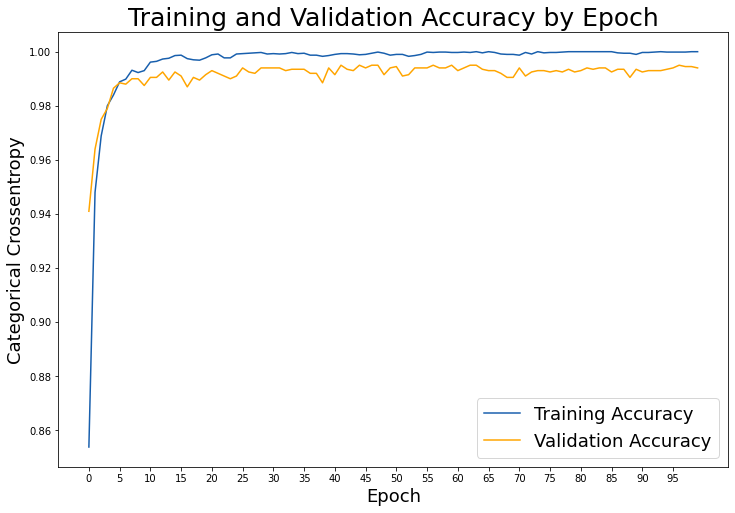

In [ ]:
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
plt.figure(figsize=(12, 8))

plt.plot(train_accuracy, label='Training Accuracy', color='#185fad')
plt.plot(val_accuracy, label='Validation Accuracy', color='orange')
plt.title('Training and Validation Accuracy by Epoch', fontsize = 25)
plt.xlabel('Epoch', fontsize = 18)
plt.ylabel('Categorical Crossentropy', fontsize = 18)
plt.xticks(range(0,100,5), range(0,100,5))

plt.legend(fontsize = 18);

Data Prediction


In [ ]:
preds = model.predict(X_test)
preds=np.argmax(preds,axis=1)

49/49 [==============================] - 0s 3ms/step


In [ ]:
df_test = df[9000:]
df_test['preds'] = preds
df_test

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,file,label,preds
9000,2136-5140-0027.flac,1,1
9001,5322-7678-0032.flac,1,1
9002,2092-145706-0064.flac,0,0
9003,1455-134435-0067.flac,1,1
9004,311-124404-0076.flac,1,1
...,...,...,...
10534,78-369-0004.flac,1,1
10535,8088-284756-0073.flac,1,1
10536,5192-19397-0068.flac,1,1
10537,7059-88364-0004.flac,0,0


In [ ]:
df_test['label'] = df_test['label'].astype(int)
df_test[df_test['label'] != df_test['preds']]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,file,label,preds
9038,3259-158083-0078.flac,0,1
9140,696-93314-0001.flac,0,1
9173,4406-16882-0066.flac,1,0
9281,250-142276-0051.flac,0,1
9598,2893-139310-0018.flac,1,0
9620,6064-56168-0008.flac,0,1
9633,3259-158083-0016.flac,0,1
9705,6531-61334-0096.flac,0,1
9860,7780-274562-0037.flac,0,1
10247,289-121665-0028.flac,0,1


In [ ]:
1-round(len(df_test[df_test['label'] != df_test['preds']])/len(df_test),3)

0.992

Sentiment Analysis

In [ ]:
import os,glob
import pandas as pd
# Defining the relative path to folder containing all the text file_names
folder_path = "/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/train-clean-100/CombinedData/"
file_names = []

# Create a dataframe list by using a list comprehension and concatenate 
file_names = [pd.read_csv(file, delimiter='-', names =['audio_folder', 'audio_name', 'text'] ) for file in glob.glob(os.path.join(folder_path ,"*.txt"))]
file_names_df = pd.concat(file_names)
file_names_df['text'] = file_names_df['text'].str[5:]

# Creating copy

combined_df = file_names_df

# defining and calling pre-trained model 
senti_analyser = SentimentIntensityAnalyzer()
combined_df['scores'] = combined_df['text'].apply(lambda text: senti_analyser.polarity_scores(text))
#combined_df.head()
combined_df['compound']  = combined_df['scores'].apply(lambda x: x['compound'])
#combined_df.head()
combined_df['sentiment'] = combined_df['compound'].apply(lambda x: 'Negative' if x <0 else 'Positive')
combined_df.head()

# Saving the concatenated data into maindata.csv file
header = ['audio_folder', 'audio_name', 'text', 'sentiment']
combined_df.to_csv("/content/drive/MyDrive/Fall 2022/Machine Learning/Project/LibriSpeech/Sentiment_analysed_data.csv",columns=header)

ValueError: ignored

In [ ]:
!pip install text2emotion

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 57 kB 2.5 MB/s 
     |████████████████████████████████| 240 kB 10.2 MB/s 
  Created wheel for emoji: filename=emoji-2.2.0-py3-none-any.whl size=234927 sha256=a3afac0c897e1b0ea6a9377b7ea6bc497bf12e51a0a4a109b18b9bf5c0077bc5
  Stored in directory: /root/.cache/pip/wheels/f3/e3/f2/1de1c2e3ed742e1df73e0f15d58864e50c7e64f607b548d6cf
Successfully built emoji


In [ ]:
!pip install emot

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 61 kB 14 kB/s 


In [ ]:
import text2emotion as te

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
text="I had a great day."

In [ ]:
te.get_emotion(text)

{'Happy': 1.0, 'Angry': 0.0, 'Surprise': 0.0, 'Sad': 0.0, 'Fear': 0.0}